# Abstract Syntax Three Generation

This notebook serves as a tutorial for the use of `quantumC`

## Generate JSON

Use `astJsonGen` function from `pyast` _module_ to simply convert all the `.c` files in the chosen `input_dir` to `.json`, `json_out` directory will be automatically created.

In [1]:
from quantumC.pyast import astJsonGen

astJsonGen(input_dir="c_code")

JSON output saved to: /home/franco/Dropbox/AA_Fra_Rosnati/B_Education/AA_University/AA_PoliMi/AA_Ing/01_Magistrale/HPC_engineering/4_sem_HPC/CTO_Agosta/COT_Project/QuantumC/json_out/try.json


## Dataclasses

`astdataclasses` contains:
- python `dataclass` definition for **AST** _tokens_
- `ASTProcessor` class that helps to _load (from json) and manage_ the **AST**


In [2]:
import os
from quantumC.astdataclasses import *


Find all `.json` files available to load.

In [3]:
# Check if the directory exists
json_out_dir = "json_out"
if os.path.exists(json_out_dir) and os.path.isdir(json_out_dir):
	# List all files in the directory
	files = os.listdir(json_out_dir)
	print(f"Files in '{json_out_dir}':")
	for file in files:
		print(file)
else:
	print(f"The directory '{json_out_dir}' does not exist!")

Files in 'json_out':
try.json


Choose **AST** file and intilize class.

In [4]:
# Path to your JSON file (replace this with your actual JSON file path)
json_file_path = "json_out/try.json"

# Initialize the ASTProcessor with the JSON path
ast_processor = ASTProcessor(json_file_path)

ASTProcessor initialized for try


Displaying the entire AST inline:


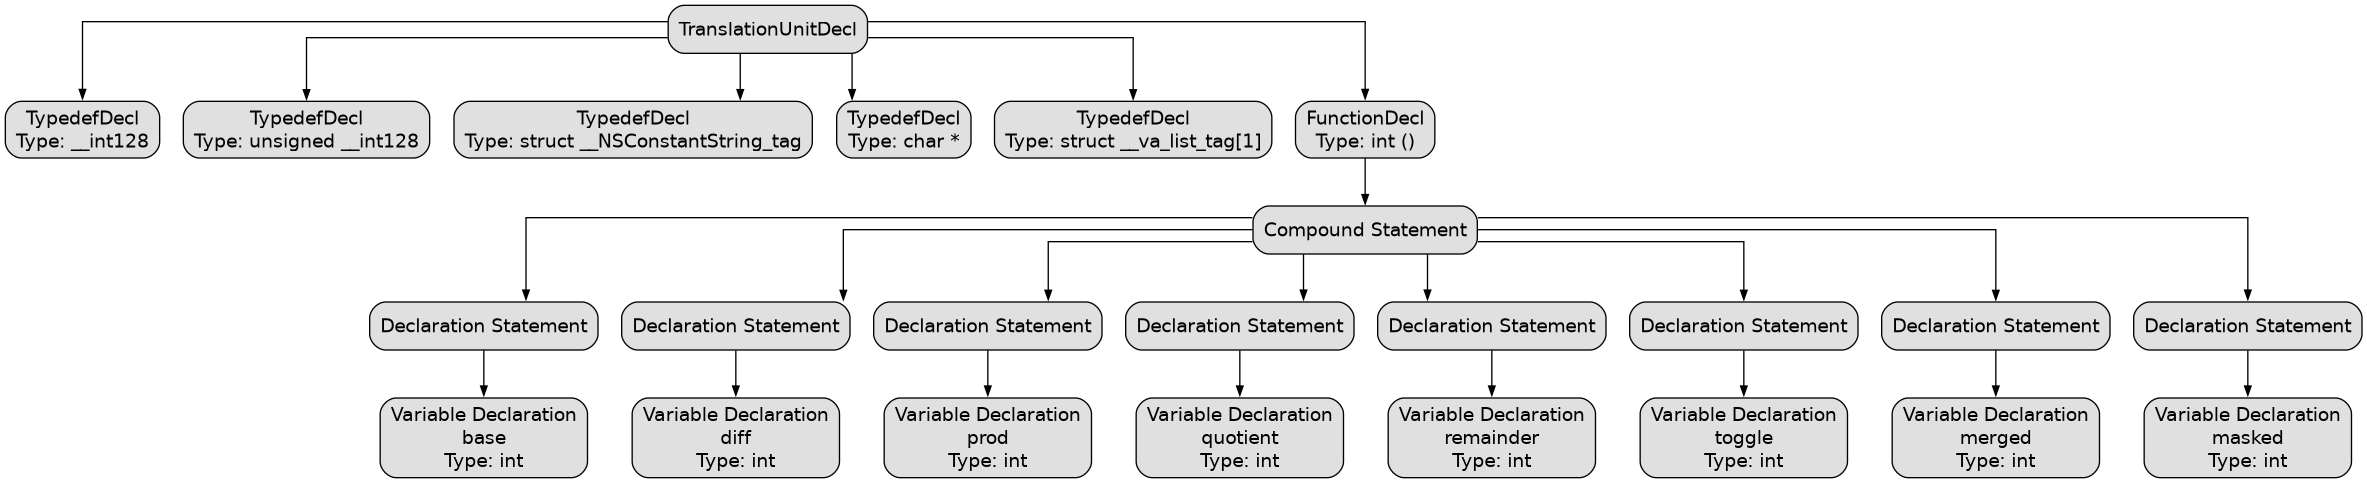

In [5]:
# Display the entire AST inline as an image
print("Displaying the entire AST inline:")
display(ast_processor.show_ast_image(ast_processor.root))


Displaying AST of 'main' function:


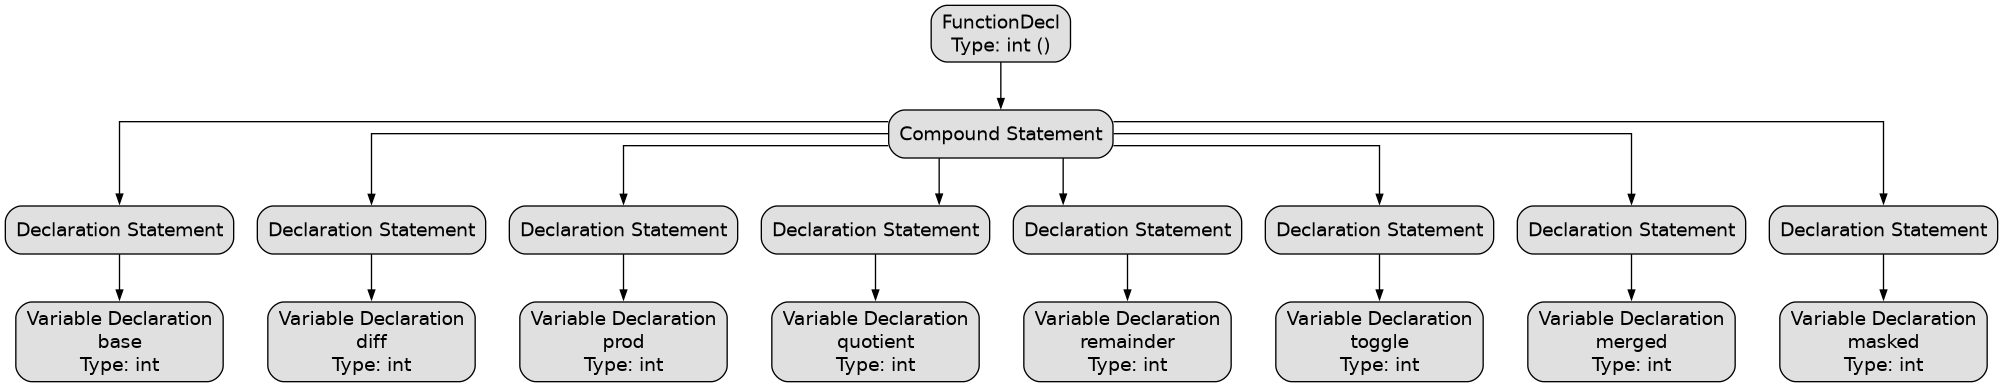

In [6]:
# Locate and display the 'main' function subtree (if exists)
main_func = None
if isinstance(ast_processor.root, TranslationUnitDecl) and ast_processor.root.inner:
    for child in ast_processor.root.inner:
        if isinstance(child, FunctionDecl) and child.name == "main":
            main_func = child
            break

if main_func:
    print("Displaying AST of 'main' function:")
    display(ast_processor.show_ast_image_from_function(main_func))
else:
    print("No function named 'main' found in the AST.")


In [7]:
# Save the entire AST as a Graphviz image
print("Saving the entire AST as a Graphviz image...")
ast_processor.save_ast_image(ast_processor.root)


Saving the entire AST as a Graphviz image...


AST visualization saved to output/img_out/try_ast_img.png


In [8]:
# Save the 'main' function AST as a Graphviz image if it exists
if main_func:
    print("Saving the 'main' function AST as a Graphviz image...")
    ast_processor.save_ast_image_from_function(main_func)


Saving the 'main' function AST as a Graphviz image...
Function-only AST visualization saved to output/img_out/try_ast_img_from_function.png


In [9]:
# Write AST instances to a text file
ast_processor.write_ast_instances_txt(ast_processor.root)


AST instances have been written to 'output/txt_out/try_ast_instances.txt'


In [10]:
# Inspect the textual representation of the entire AST
print("Displaying the textual representation of the AST:")
ast_text = ast_processor.format_ast(ast_processor.root)
for line in ast_text:
    print(line)


Displaying the textual representation of the AST:
TranslationUnitDecl [id=0x5f70db53a3b8]
  TypedefDecl [id=0x5f70db53abe8]
  TypedefDecl [id=0x5f70db53ac58]
  TypedefDecl [id=0x5f70db53af60]
  TypedefDecl [id=0x5f70db53b008]
  TypedefDecl [id=0x5f70db53b300]
  FunctionDecl [id=0x5f70db59a628]
    Name: main
    Type: int ()
    CompoundStmt [id=0x5f70db59b080]
      DeclStmt [id=0x5f70db59a818]
        VarDecl [id=0x5f70db59a730]
          Name: base
          Type: int
          Init:
            c
      DeclStmt [id=0x5f70db59a948]
        VarDecl [id=0x5f70db59a848]
          Name: diff
          Type: int
          Init:
            c
      DeclStmt [id=0x5f70db59aa78]
        VarDecl [id=0x5f70db59a978]
          Name: prod
          Type: int
          Init:
            c
      DeclStmt [id=0x5f70db59aba8]
        VarDecl [id=0x5f70db59aaa8]
          Name: quotient
          Type: int
          Init:
            c
      DeclStmt [id=0x5f70db59acd8]
        VarDecl [id=0x5f70db5

In [11]:
# Inspect the textual representation of the 'main' function AST if it exists
if main_func:
    print("Displaying the textual representation of the 'main' function AST:")
    main_func_text = ast_processor.format_ast(main_func)
    for line in main_func_text:
        print(line)


Displaying the textual representation of the 'main' function AST:
FunctionDecl [id=0x5f70db59a628]
  Name: main
  Type: int ()
  CompoundStmt [id=0x5f70db59b080]
    DeclStmt [id=0x5f70db59a818]
      VarDecl [id=0x5f70db59a730]
        Name: base
        Type: int
        Init:
          c
    DeclStmt [id=0x5f70db59a948]
      VarDecl [id=0x5f70db59a848]
        Name: diff
        Type: int
        Init:
          c
    DeclStmt [id=0x5f70db59aa78]
      VarDecl [id=0x5f70db59a978]
        Name: prod
        Type: int
        Init:
          c
    DeclStmt [id=0x5f70db59aba8]
      VarDecl [id=0x5f70db59aaa8]
        Name: quotient
        Type: int
        Init:
          c
    DeclStmt [id=0x5f70db59acd8]
      VarDecl [id=0x5f70db59abd8]
        Name: remainder
        Type: int
        Init:
          c
    DeclStmt [id=0x5f70db59ae08]
      VarDecl [id=0x5f70db59ad08]
        Name: toggle
        Type: int
        Init:
          c
    DeclStmt [id=0x5f70db59af38]
      VarDecl 

In [12]:
# Assuming the ASTProcessor has been initialized as `ast_processor`
# Write the AST instances to the 'ast_instances.txt' file
ast_processor.write_ast_instances_txt(ast_processor.root)

# Now display the contents of the 'ast_instances.txt' file
txt_file_path = os.path.join(ast_processor.txt_out_dir, f"{ast_processor.basename}_ast_instances.txt")

print(f"Displaying the contents of '{txt_file_path}':")
with open(txt_file_path, "r", encoding="utf-8") as f:
    print(f.read())


AST instances have been written to 'output/txt_out/try_ast_instances.txt'
Displaying the contents of 'output/txt_out/try_ast_instances.txt':
=== AST Instances Dump ===

Node kind: TranslationUnitDecl
  id: 0x5f70db53a3b8
  kind: TranslationUnitDecl
  id: 0x5f70db53a3b8
  loc: {}
  range: {'begin': {}, 'end': {}}
  inner: [TypedefDecl(kind='TypedefDecl', id='0x5f70db53abe8', loc={}, range={'begin': {}, 'end': {}}, name='__int128_t', type={'qualType': '__int128'}, isImplicit=True, inner=[BuiltinType(kind='BuiltinType', id='0x5f70db53a980', loc=None, range=None, qualType='__int128')]), TypedefDecl(kind='TypedefDecl', id='0x5f70db53ac58', loc={}, range={'begin': {}, 'end': {}}, name='__uint128_t', type={'qualType': 'unsigned __int128'}, isImplicit=True, inner=[BuiltinType(kind='BuiltinType', id='0x5f70db53a9a0', loc=None, range=None, qualType='unsigned __int128')]), TypedefDecl(kind='TypedefDecl', id='0x5f70db53af60', loc={}, range={'begin': {}, 'end': {}}, name='__NSConstantString', type=